### What is the dropout why it is used ?

### Dropout refers to data, or noise, that's intentionally dropped from a 
### neural network to improve processing and time to results. A neural network
### is software attempting to emulate the actions of the human brain.

### Generate Data

In [1]:
import numpy as np

In [2]:
x_train=np.linspace(-1,1,20)
y_train=np.array([-0.6561,-0.3099,0.59035,-0.50855,-0.285,
                 -0.2443,-0.4444,-0.6784,0.9876,-0.7689,
                 -0.7654,0.6543,0.5674,-0.4211,0.7645,
                  0.6548,0.2345,-0.73452,-0.4535,0.6734])
x_test=np.linspace(-1,1,20)
y_test=np.array([-0.56743,0.8965,0.7834,-0.7654,0.00,
                 0.78,0.9856,-0.3452,0.777,-0.867,
                 -0.657,0.6547,0.8934,-0.222,0.6547,
                0.6547,0.8764,-0.6543,0.5643,-0.7643])

In [3]:
import matplotlib.pyplot as plt

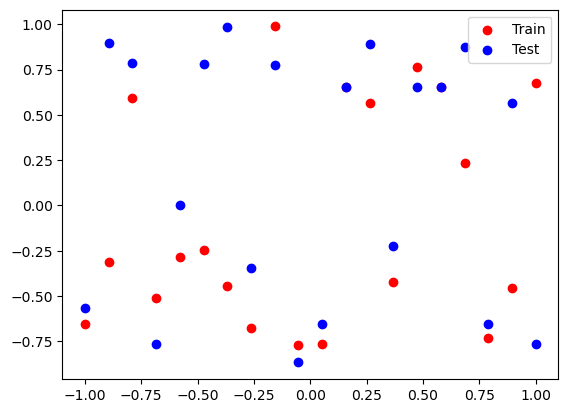

In [4]:
plt.scatter(x_train,y_train,c='red',label='Train')
plt.scatter(x_test,y_test,c='blue',label='Test')
plt.legend()
plt.show()

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

### What is the Adam
### Adaptive Moment Estimation isv an algorithm for optimization technique for gradient descent

In [6]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_1.fit(x_train, y_train, epochs=500, 
                    validation_data = (x_test, y_test),
                    verbose=False)

In [7]:
# evaluate the model
_, train_mse = model_1.evaluate(x_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(x_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.013012625277042389, Test: 0.42682474851608276


In [8]:
y_pred_1 = model_1.predict(x_test)

1/1 [==============================] - 0s 86ms/step


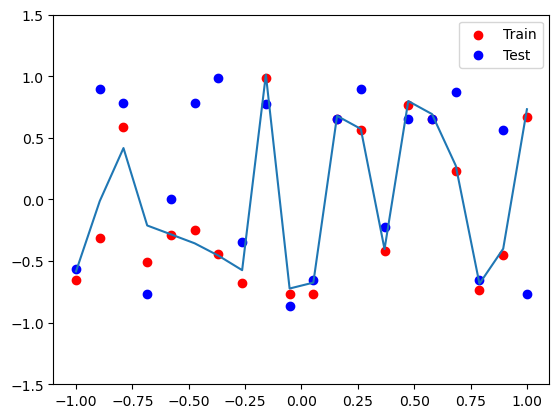

In [9]:
plt.figure()
plt.scatter(x_train, y_train, c='red', label='Train')
plt.scatter(x_test, y_test, c='blue', label='Test')
plt.plot(x_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

### Dropout model

### what is the dropout?
### Dense layer, also called fully-connected layer, refers to the layer 
### whose inside neurons connect to every neuron in the preceding layer.

In [10]:
from tensorflow.keras.layers import Dropout

In [11]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(x_train, y_train, epochs=500, 
                               validation_data = (x_test, y_test),
                               verbose=False)

In [12]:
_, train_mse = model_2.evaluate(x_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(x_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.16423656046390533, Test: 0.4494878649711609


In [13]:
y_pred_2 = model_2.predict(x_test)

1/1 [==============================] - 0s 69ms/step


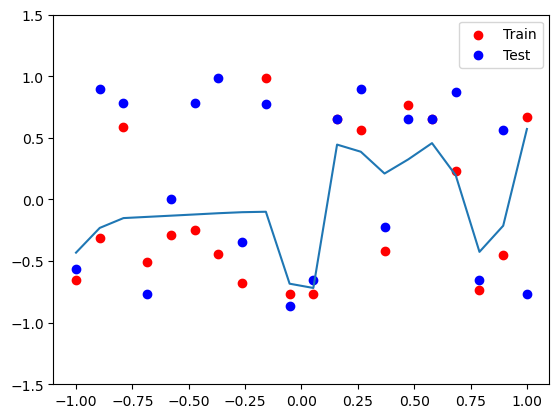

In [14]:
plt.figure()
plt.scatter(x_train, y_train, c='red', label='Train')
plt.scatter(x_test, y_test, c='blue', label='Test')
plt.plot(x_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

### End of the Dropout